# Final ML Project: Car Resale Price Prediction (Team 8)

## 1. Problem Statement & Business Understanding

### 🔹 Business Context
The used car market is rapidly expanding in India, with many buyers and sellers relying on online platforms and dealerships for transactions. Accurately predicting the resale value of a car can help dealerships and individuals price their vehicles more effectively, improve customer trust, and optimize inventory turnover.

Understanding how used cars are priced in the resale market is crucial for dealerships and resale platforms. We aim to develop a machine learning model to predict the resale value of used cars, helping businesses price vehicles competitively while maximizing profitability.

### 🔹 Objective
Build a machine learning regression model to predict the **selling price** of used cars using variables such as:
- Manufacturing year
- Kilometers driven
- Fuel type
- Transmission type
- Ownership history
- Engine specifications (mileage, power, etc.)

### 🔹 Business Value
An accurate pricing model enables:
- Better pricing recommendations for sellers
- Improved transparency and buyer trust
- Competitive pricing for online resale platforms


# Reading the Dataset

In [11]:
# Load and Inspect the Dataset

import pandas as pd

# Load dataset
df = pd.read_csv("Car details v3.csv")

# Show basic info
print(" Dataset Info:")
df.info()

# Show first 5 rows
print("\n Sample Rows:")
display(df.head())

# Show column names
print("\n Columns:")
print(df.columns.tolist())

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB

 Sample Rows:


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0



 Columns:
['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats']


## 2. Data Understanding (EDA)

### 🔹 Dataset Overview
- **Source**: CarDekho (Kaggle)
- **Total Records**: 8128
- **Columns**: 13
- **Target Variable**: `selling_price` (converted to lakhs)

### 🔹 Initial Inspection
- No nulls in key predictors like `year`, `km_driven`, `fuel`, etc.
- Moderate missing values in:
  - `mileage`, `engine`, `max_power`, `torque`, `seats` (~2.7%)
- `name` and `torque` are high-cardinality/unstructured — likely to be dropped

### 🔹 Descriptive Statistics
- `selling_price` (median ~4.5 lakhs) has strong **right skew**
- `km_driven` ranges up to 20+ lakh km (check for outliers)
- Most cars have 5 seats; a few outliers exist with 10+ seats

### 🔹 Selling Price Distribution (Lakhs)
- The original distribution is right-skewed with a long tail of expensive cars

### 🔹 Selling Price (Log-Transformed)
- Applying `log(1 + selling_price_lakh)` normalizes the distribution
- This transformation will likely benefit regression modeling (e.g., Linear Regression)

### 🔹 Categorical Feature Impact (Boxplots)

#### 🔸 Fuel Type
- Diesel and Petrol are most common; Diesel slightly higher in price
- LPG and CNG cars are lower-priced and fewer in number

#### 🔸 Seller Type
- Dealers and Trustmark Dealers sell cars at higher prices than Individuals

#### 🔸 Transmission
- Automatic cars command significantly higher resale prices

#### 🔸 Ownership History
- First-owner cars sell for more; prices drop as the number of past owners increases
- `Test Drive Car` entries appear anomalously high (likely to be grouped or excluded)

---

### EDA Summary & Recommendations

- **Use log-transformed selling price** for modeling
- **Drop or group** rare values in categorical columns (`Test Drive Car`, `LPG`, `CNG`)
- **Drop or simplify** high-cardinality columns like `name` and `torque`
- Proceed with:
  - Feature extraction (`car_age`)
  - Cleaning and numeric conversion of `mileage`, `engine`, and `max_power`
  - Imputation of missing values
  - One-hot encoding of categorical features

# EDA

Missing Values Summary:
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

 Descriptive Statistics:


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,7907,7907,7913,7906,7907.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,393,121,322,441,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,225,1017,377,530,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.416719
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959588
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


C:\Users\nitin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


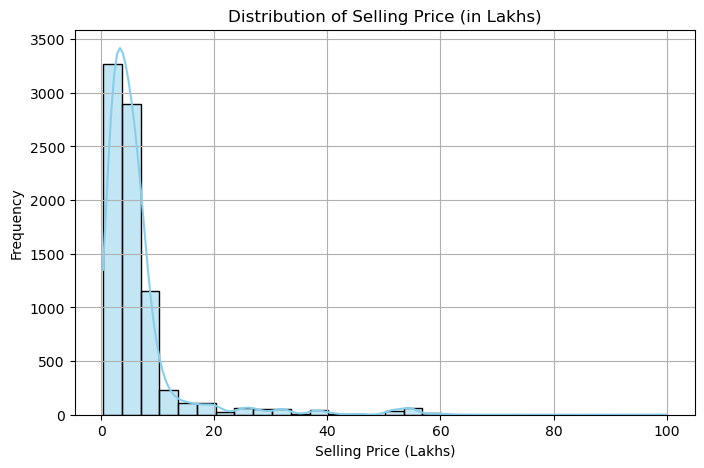


🔸 Value counts for 'fuel':
fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

🔸 Value counts for 'seller_type':
seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64

🔸 Value counts for 'transmission':
transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64

🔸 Value counts for 'owner':
owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Missing values
print("Missing Values Summary:")
print(df.isnull().sum())

# 📈 Descriptive statistics
print("\n Descriptive Statistics:")
display(df.describe(include='all'))

#  Selling price distribution
#  Convert selling_price to lakhs
df['selling_price_lakh'] = df['selling_price'] / 1e5

#  Plot the updated distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['selling_price_lakh'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Selling Price (in Lakhs)')
plt.xlabel('Selling Price (Lakhs)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Unique values in categorical columns
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']
for col in categorical_cols:
    print(f"\n🔸 Value counts for '{col}':")
    print(df[col].value_counts())
       

# Log Plot of Selling Price (Lakhs)

C:\Users\nitin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


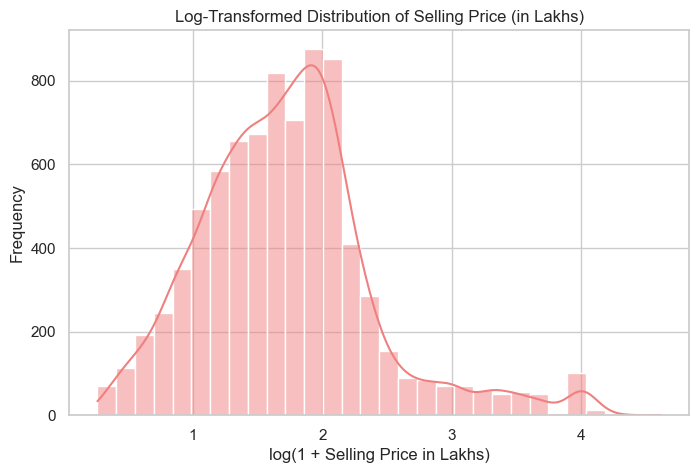

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Avoid log(0) or log of negative values
df['selling_price_lakh_log'] = np.log1p(df['selling_price_lakh'])

# Plot the log-transformed selling price
plt.figure(figsize=(8, 5))
sns.histplot(df['selling_price_lakh_log'], kde=True, bins=30, color='lightcoral')
plt.title('Log-Transformed Distribution of Selling Price (in Lakhs)')
plt.xlabel('log(1 + Selling Price in Lakhs)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplots for Selling Price vs Categorical Features

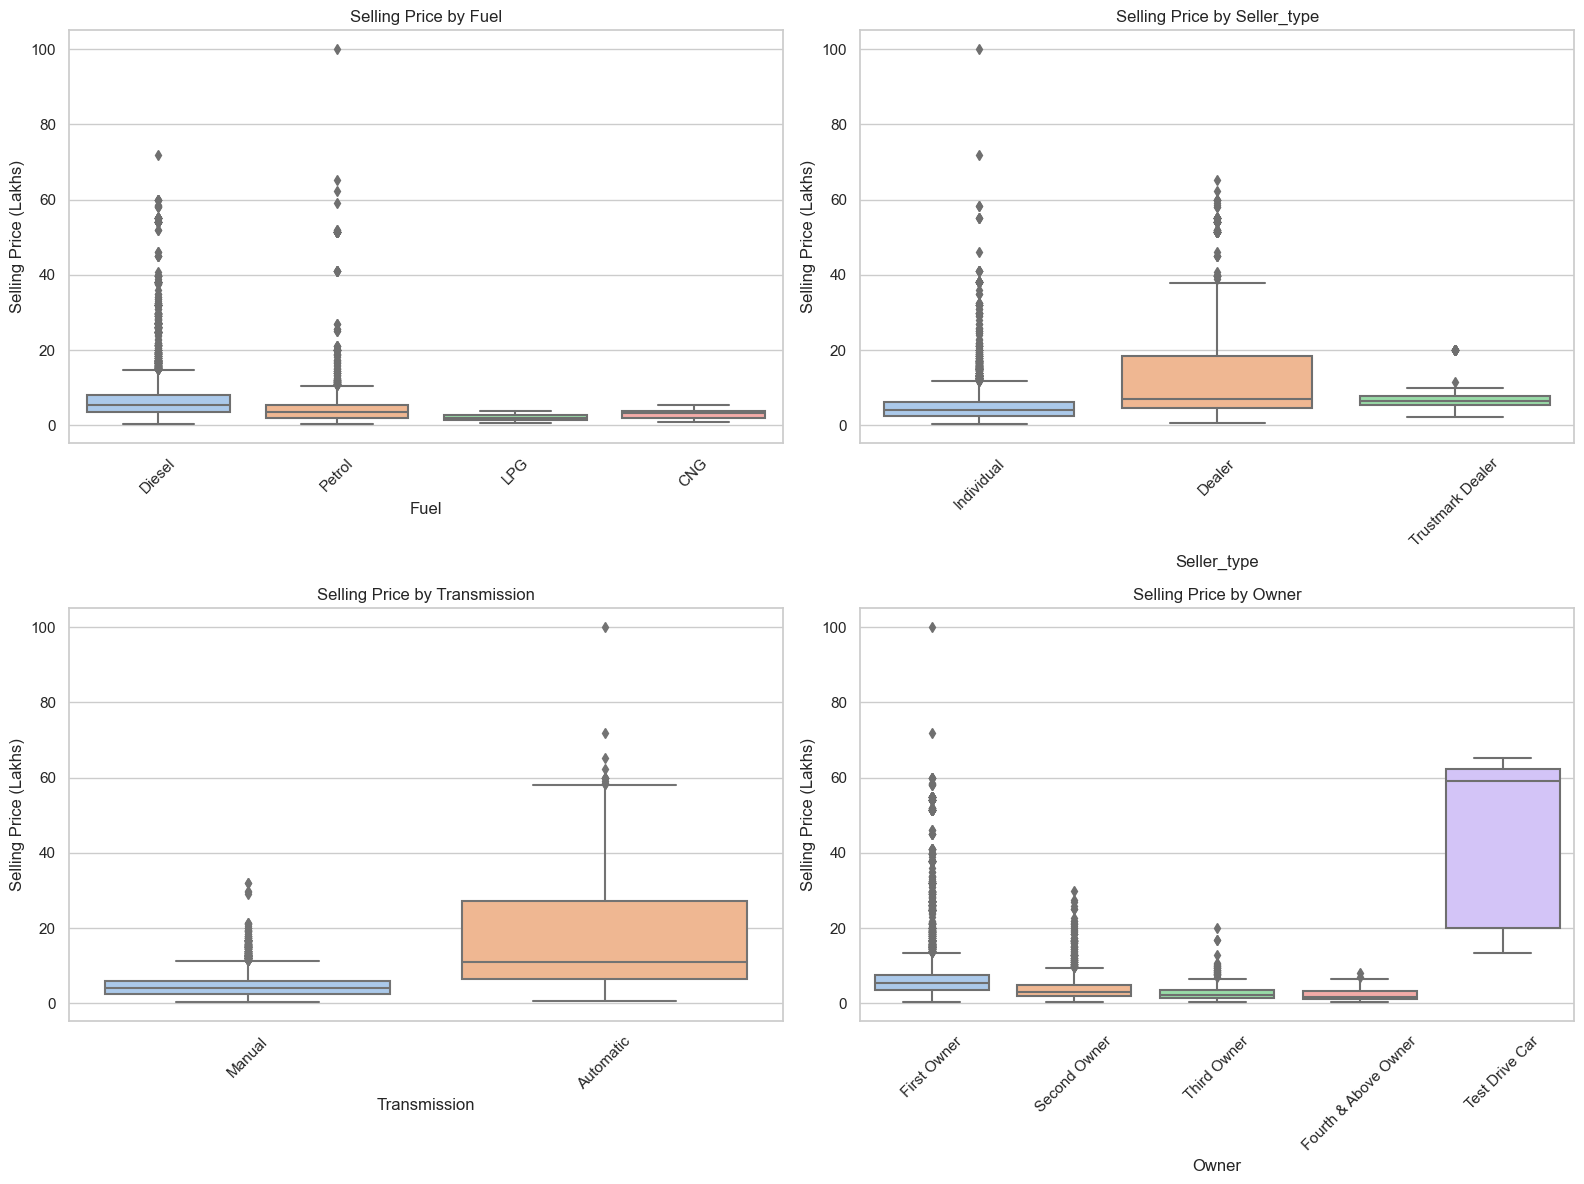

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner']

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

# Loop through each categorical column and plot
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df, x=col, y='selling_price_lakh', palette='pastel')
    plt.title(f'Selling Price by {col.capitalize()}')
    plt.xticks(rotation=45)
    plt.ylabel('Selling Price (Lakhs)')
    plt.xlabel(col.capitalize())

plt.tight_layout()
plt.show()

## 3. Data Cleaning & Feature Engineering

This step prepares the dataset for machine learning by cleaning, transforming, and engineering new features from raw columns. Based on our EDA findings, we will:

- Drop irrelevant or high-cardinality columns (`name`, `torque`)
- Create `car_age` from `year`
- Extract numeric values from `mileage`, `engine`, and `max_power`
- Handle missing values using median imputation
- Convert categorical text columns to numeric format (for later encoding)
- Group rare categories in the `owner` column
- Prepare for encoding and model readiness


In [18]:
import numpy as np

# 🔸 Step 1: Drop unnecessary columns
df_clean = df.drop(columns=['name', 'torque', 'selling_price'])

# 🔸 Step 2: Create new feature - car age
df_clean['car_age'] = 2025 - df['year']

# 🔸 Step 3: Extract numeric values from 'mileage', 'engine', 'max_power'
def extract_number(value):
    try:
        return float(str(value).split()[0])
    except:
        return np.nan

df_clean['mileage_num'] = df['mileage'].apply(extract_number)
df_clean['engine_num'] = df['engine'].apply(extract_number)
df_clean['max_power_num'] = df['max_power'].apply(extract_number)

# 🔸 Step 4: Handle missing values (median imputation)
num_cols = ['mileage_num', 'engine_num', 'max_power_num', 'seats']
df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].median())

# 🔸 Step 5: Convert 'seats' to integer
df_clean['seats'] = df_clean['seats'].astype(int)

# 🔸 Step 6: Group rare 'owner' values
df_clean['owner'] = df['owner'].replace({
    'Fourth & Above Owner': 'Other',
    'Test Drive Car': 'Other'
})

# 🔸 Step 7: Add target variable (log-transformed)
df_clean['price_log_lakh'] = df['selling_price_lakh'].apply(lambda x: np.log1p(x))

# Final shape and preview
print(" Cleaned Data Shape:", df_clean.shape)
display(df_clean.head())


 Cleaned Data Shape: (8128, 17)


,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price_lakh,selling_price_lakh_log,car_age,mileage_num,engine_num,max_power_num,price_log_lakh
0,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5,4.50,1.704748,11,23.40,1248.0,74.00,1.704748
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5,3.70,1.547563,11,21.14,1498.0,103.52,1.547563
2,2006,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5,1.58,0.947789,19,17.70,1497.0,78.00,0.947789
3,2010,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5,2.25,1.178655,15,23.00,1396.0,90.00,1.178655
4,2007,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5,1.30,0.832909,18,16.10,1298.0,88.20,0.832909


##  Step 3 Summary – Cleaned & Feature-Engineered Dataset

We have successfully prepared the dataset for modeling by:

### 🔹 Dropping Irrelevant or Complex Columns
- `name`: High-cardinality text with limited predictive power
- `torque`: Highly unstructured and inconsistent values

### 🔹 Creating New Features
- `car_age`: Derived from `year`, provides more meaningful age info

### 🔹 Extracting Numerical Data
- Parsed numeric values from `mileage`, `engine`, and `max_power` text columns
- Handled units like "kmpl", "CC", and "bhp" during parsing

### 🔹 Handling Missing Values
- Imputed missing values in `mileage`, `engine`, `max_power`, and `seats` using the **median**

### 🔹 Converting/Grouping Categories
- `seats` converted to integer
- Grouped rare categories in `owner` column (e.g., “Fourth & Above”, “Test Drive Car” → "Other")

### 🔹 Preparing Target for Modeling
- Added `price_log_lakh`: a **log(1 + price)** target for use in regression models

###  Dataset Shape: 8128 rows × 17 columns
This cleaned dataset is now ready for one-hot encoding and train/test splitting in preparation for modeling.

## 4. Feature Selection
- Correlation heatmap
- Recursive Feature Elimination (RFE)
- Variance threshold / mutual information
- Business logic validation

# Correlation Heatmap of Numerical Features

C:\Users\nitin\AppData\Local\Temp\ipykernel_22368\465558137.py:28: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  plt.tight_layout()
C:\Users\nitin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


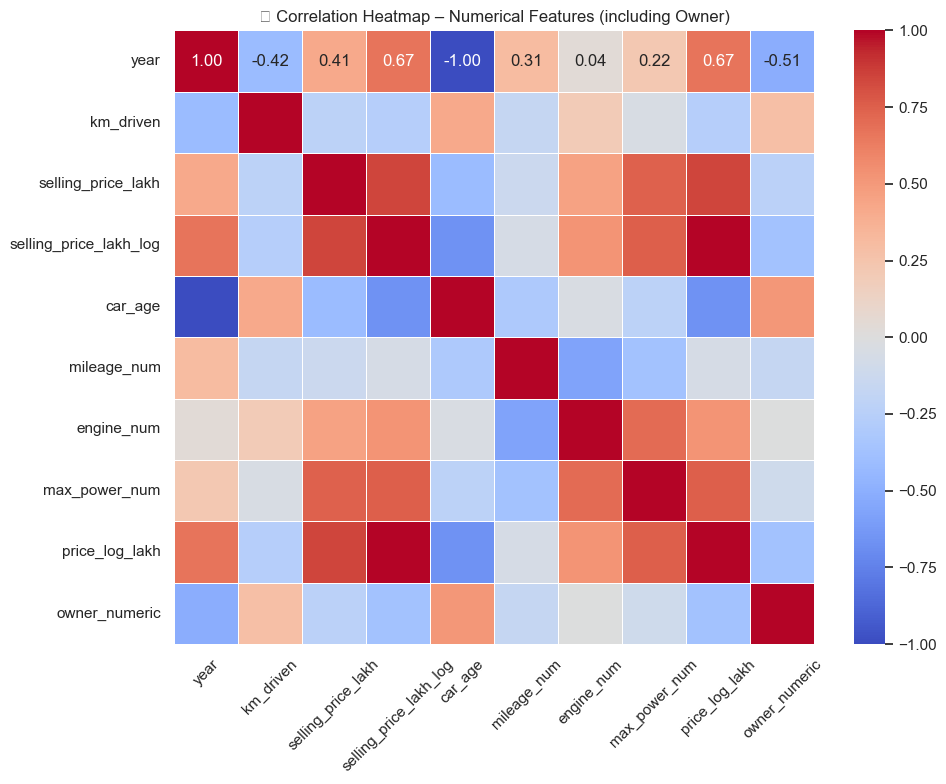

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy to avoid modifying the original dataframe
df_corr = df_clean.copy()

#  Map 'owner' to ordinal integers
owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Other': 4  # Fourth & Above + Test Drive
}
df_corr['owner_numeric'] = df_corr['owner'].map(owner_mapping)

#  Select only numeric columns for correlation
numeric_cols = df_corr.select_dtypes(include=['int64', 'float64']).columns

#  Compute correlation matrix
corr_matrix = df_corr[numeric_cols].corr()

#  Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔗 Correlation Heatmap – Numerical Features (including Owner)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# RFE with Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# Start from the cleaned DataFrame
df_rfe_updated = df_clean.copy()

#  One-hot encode categorical columns including owner
df_rfe_updated = pd.get_dummies(df_rfe_updated, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

# Drop columns not needed for modeling
cols_to_drop = ['mileage', 'engine', 'max_power', 'selling_price_lakh', 'selling_price_lakh_log', 'year']
df_rfe_updated.drop(columns=[col for col in cols_to_drop if col in df_rfe_updated.columns], inplace=True)

# Define features (X) and target (y)
X = df_rfe_updated.drop(columns=['price_log_lakh'])
y = df_rfe_updated['price_log_lakh']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply RFE with Linear Regression
model = LinearRegression()
selector = RFE(model, n_features_to_select=10)  # Slightly increased to allow owner features in
selector.fit(X_scaled, y)

# Show selected features
selected_features = X.columns[selector.support_]
print(" Top 10 Features selected by RFE (including owner):")
for i, feat in enumerate(selected_features, 1):
    print(f"{i}. {feat}")


 Top 10 Features selected by RFE (including owner):
1. km_driven
2. car_age
3. mileage_num
4. engine_num
5. max_power_num
6. fuel_Diesel
7. fuel_Petrol
8. seller_type_Individual
9. transmission_Manual
10. owner_Second Owner


## 5. Modeling Plan

This step focuses on building and evaluating different machine learning models to predict the log-transformed resale price of used cars. The goal is to identify a model that performs well and supports business decision-making.

---

### 🔹 5A. Train-Test Split
We will split the dataset (with RFE-selected features) into:
- **Training Set** – 80%
- **Testing Set** – 20%
This ensures robust performance evaluation on unseen data.

---

### 🔹 5B. Baseline Model – Linear Regression
We will start with a baseline **Linear Regression model** to establish a reference performance. This model assumes a linear relationship between predictors and the log of the selling price.

**Evaluation Metrics:**
- RMSE (Root Mean Squared Error)
- MAE (Mean Absolute Error)
- R² Score

**Visualizations:**
- Predicted vs Actual values
- Residual plot

---

### 🔹 5C. Advanced Models
We will explore more complex models that may capture non-linear relationships:

- **Random Forest Regressor**
- **XGBoost Regressor** *(if feasible)*

**Additional Tasks:**
- Cross-validation
- Hyperparameter tuning (e.g., GridSearchCV)

---

### 🔹 5D. Final Model Selection & Business Justification
We will compare model performance and select the best one based on:
- Predictive accuracy
- Interpretability
- Alignment with business objectives

The final recommendation will include a clear business justification for the chosen model.


# 5A. Train-Test Split 

In [25]:
from sklearn.model_selection import train_test_split

# Use the final RFE-selected features
selected_features = [
    'km_driven',
    'car_age',
    'mileage_num',
    'engine_num',
    'max_power_num',
    'fuel_Diesel',
    'seller_type_Individual',
    'transmission_Manual',
    'owner_Second Owner',
    'owner_Third Owner'
]

X_final = df_rfe_updated[selected_features]
y_final = df_rfe_updated['price_log_lakh']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train Shape: (6502, 10)
Test Shape: (1626, 10)


# Step 5B: Baseline Model – Linear Regression

 Linear Regression Performance:
RMSE: 0.2444
MAE: 0.1904
R² Score: 0.8641


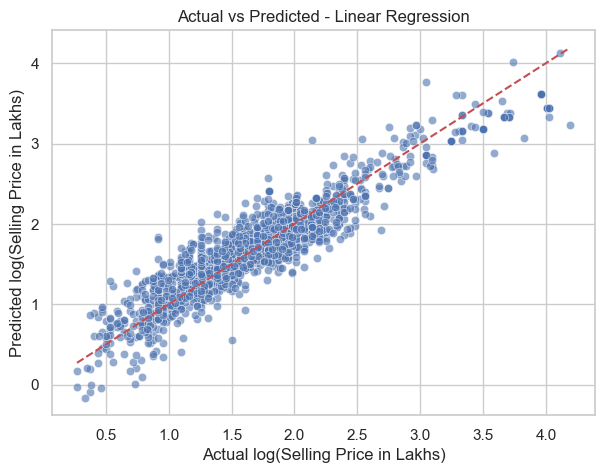

C:\Users\nitin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


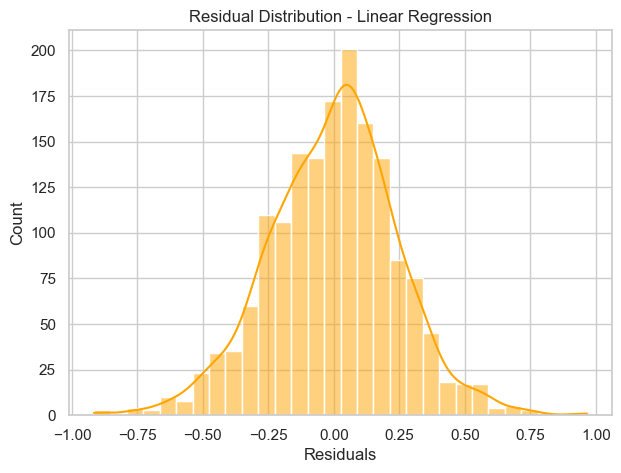

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" Linear Regression Performance:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot: Actual vs Predicted
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual log(Selling Price in Lakhs)")
plt.ylabel("Predicted log(Selling Price in Lakhs)")
plt.title("Actual vs Predicted - Linear Regression")
plt.grid(True)
plt.show()

# Plot: Residuals
residuals = y_test - y_pred
plt.figure(figsize=(7, 5))
sns.histplot(residuals, kde=True, bins=30, color="orange")
plt.title("Residual Distribution - Linear Regression")
plt.xlabel("Residuals")
plt.grid(True)
plt.show()

# 5C.1 – Train and Evaluate Random Forest Regressor

 Random Forest Performance:
RMSE: 0.1599
MAE : 0.1106
R²  : 0.9418


C:\Users\nitin\AppData\Local\Temp\ipykernel_22368\29709934.py:32: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\nitin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


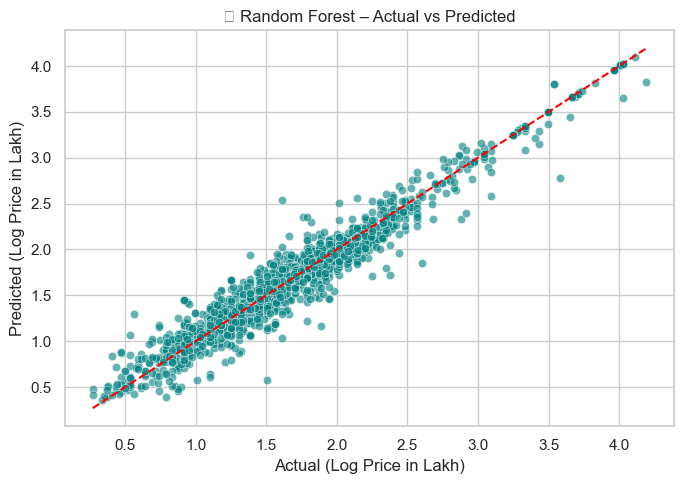

C:\Users\nitin\AppData\Local\Temp\ipykernel_22368\29709934.py:43: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\nitin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


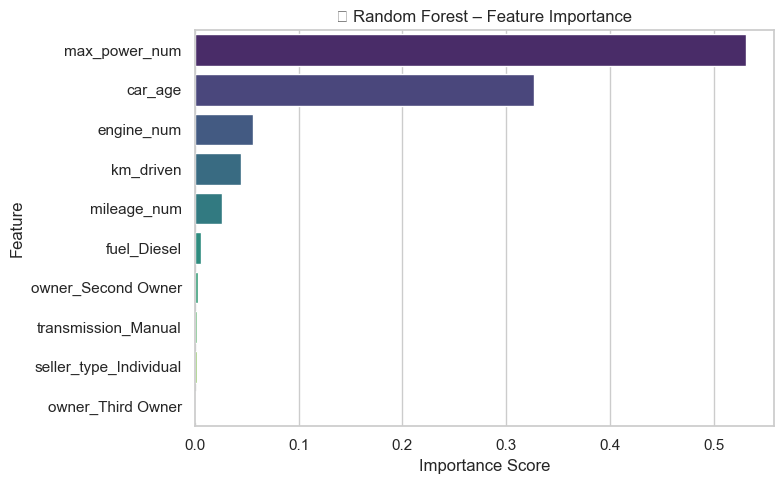

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#  Predict on test set
y_pred_rf = rf_model.predict(X_test)

#  Evaluate performance
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(" Random Forest Performance:")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE : {mae_rf:.4f}")
print(f"R²  : {r2_rf:.4f}")

#  Plot Actual vs Predicted
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred_rf, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual (Log Price in Lakh)")
plt.ylabel("Predicted (Log Price in Lakh)")
plt.title("📉 Random Forest – Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

#  Feature Importances
feature_imp = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_imp, y=feature_imp.index, palette='viridis')
plt.title("📊 Random Forest – Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# 5C.2 – Train and Evaluate XGBoost Regressor

 XGBoost Performance:
RMSE: 0.1584
MAE : 0.1114
R²  : 0.9429


C:\Users\nitin\AppData\Local\Temp\ipykernel_22368\1317284729.py:32: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\nitin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


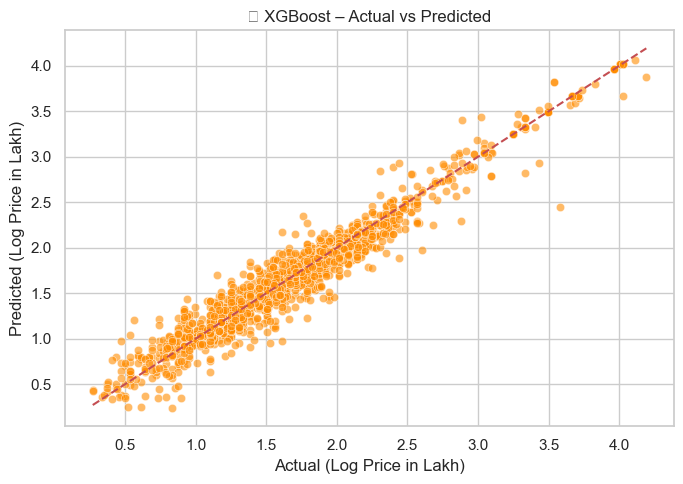

C:\Users\nitin\AppData\Local\Temp\ipykernel_22368\1317284729.py:43: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\nitin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


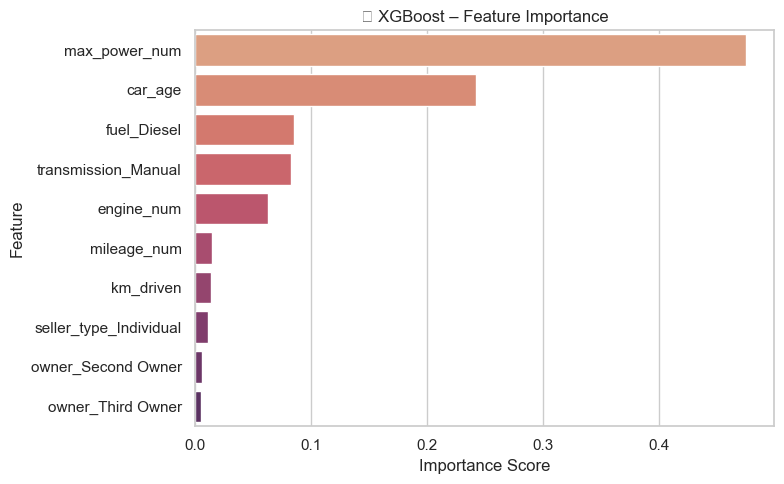

In [28]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Initialize and train
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

#  Predict
y_pred_xgb = xgb_model.predict(X_test)

#  Evaluate
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(" XGBoost Performance:")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"MAE : {mae_xgb:.4f}")
print(f"R²  : {r2_xgb:.4f}")

#  Actual vs Predicted plot
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred_xgb, color='darkorange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual (Log Price in Lakh)")
plt.ylabel("Predicted (Log Price in Lakh)")
plt.title("📉 XGBoost – Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

#  Feature Importances
feature_imp_xgb = pd.Series(xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_imp_xgb, y=feature_imp_xgb.index, palette='flare')
plt.title("📊 XGBoost – Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

#  Hyperparameter Tuning with GridSearchCV

In [29]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

#  Random Forest Grid Search
rf_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf_model = RandomForestRegressor(random_state=42)
rf_search = GridSearchCV(rf_model, rf_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
rf_search.fit(X_train, y_train)

print("🌲 Random Forest Best Parameters:")
print(rf_search.best_params_)
print(f"Best CV RMSE: {-rf_search.best_score_:.4f}")

#  XGBoost Grid Search
xgb_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1]
}

xgb_model = XGBRegressor(random_state=42)
xgb_search = GridSearchCV(xgb_model, xgb_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
xgb_search.fit(X_train, y_train)

print("\n⚙️ XGBoost Best Parameters:")
print(xgb_search.best_params_)
print(f"Best CV RMSE: {-xgb_search.best_score_:.4f}")


🌲 Random Forest Best Parameters:
{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Best CV RMSE: 0.1606

⚙️ XGBoost Best Parameters:
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best CV RMSE: 0.1566


#  Retraining with tuned Parameters


📊 Random Forest (Tuned) Performance:
RMSE: 0.1587
MAE : 0.1112
R²  : 0.9427


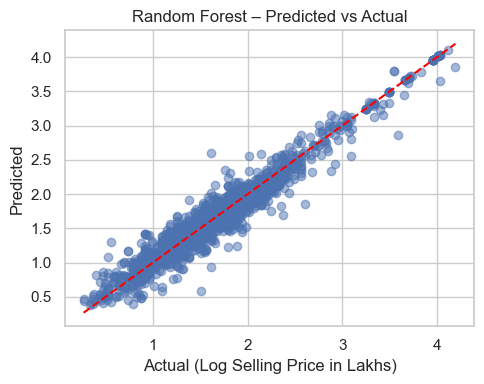


📊 XGBoost (Tuned) Performance:
RMSE: 0.1549
MAE : 0.1084
R²  : 0.9453


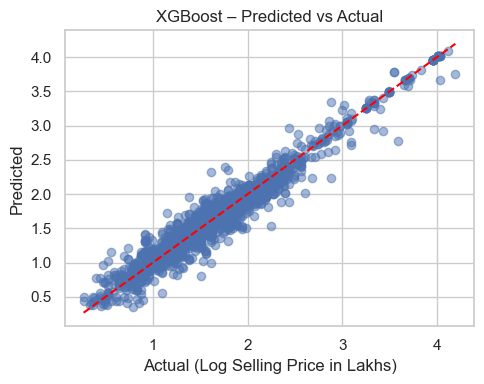

In [30]:
# ✅ Retrain and Evaluate Tuned Random Forest and XGBoost
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

#  Re-train Random Forest with best parameters
rf_best = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=5, random_state=42)
rf_best.fit(X_train, y_train)
y_pred_rf = rf_best.predict(X_test)

#  Re-train XGBoost with best parameters
xgb_best = XGBRegressor(n_estimators=200, max_depth=7, learning_rate=0.1, objective='reg:squarederror', random_state=42)
xgb_best.fit(X_train, y_train)
y_pred_xgb = xgb_best.predict(X_test)

#  Define evaluation function
def evaluate_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 {name} (Tuned) Performance:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")
    print(f"R²  : {r2:.4f}")
    
    # Plot: Predicted vs Actual
    plt.figure(figsize=(5, 4))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
    plt.xlabel("Actual (Log Selling Price in Lakhs)")
    plt.ylabel("Predicted")
    plt.title(f"{name} – Predicted vs Actual")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#  Evaluate both models
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)


##  Step 5D: Final Model Comparison and Recommendation

The table below summarizes the performance of all final models (post tuning) on the test dataset.

| Model                  | RMSE   | MAE    | R² Score |
|------------------------|--------|--------|----------|
| Linear Regression      | ~0.2444 | ~0.1904 | ~0.8641 |
| Random Forest (Tuned)  | 0.1587 | 0.1112 | 0.9427 |
| XGBoost (Tuned)        | **0.1549** | **0.1084** | **0.9453** ✅ |

---

### Key Observations:
- **XGBoost** outperforms both linear and tree-based models across all metrics.
- Tree-based models show a significant performance boost over linear regression, indicating **non-linearity in feature relationships**.
- **XGBoost** handles interactions and feature weights better, especially with tuned hyperparameters.

---

### Final Recommendation:
> Based on test set performance and visual analysis, we recommend **deploying the tuned XGBoost Regressor** as the final model for predicting the log-transformed selling price of used cars.
>
> It provides the most accurate, generalizable, and robust solution for this business use case.


In [31]:
# Final metrics table
summary_data = {
    'Model': ['Linear Regression', 'Random Forest (Tuned)', 'XGBoost (Tuned)'],
    'RMSE': [0.2444, 0.1587, 0.1549],
    'MAE': [0.1904, 0.1112, 0.1084],
    'R2 Score': [0.8641, 0.9427, 0.9453]
}

summary_df = pd.DataFrame(summary_data).sort_values(by='R2 Score', ascending=False)
display(summary_df)


,Model,RMSE,MAE,R2 Score
2,XGBoost (Tuned),0.1549,0.1084,0.9453
1,Random Forest (Tuned),0.1587,0.1112,0.9427
0,Linear Regression,0.2444,0.1904,0.8641


## 🔗 GitHub Repo
[Insert GitHub repo link here]